# Redes Neurais
# Exercício 03
Descida de Gradiente e Taxa de Aprendizado


# 1 - Setup

## Código Original do GitHub

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 2 - Criação de bases binárias de diferentes tamanhos e distribuições

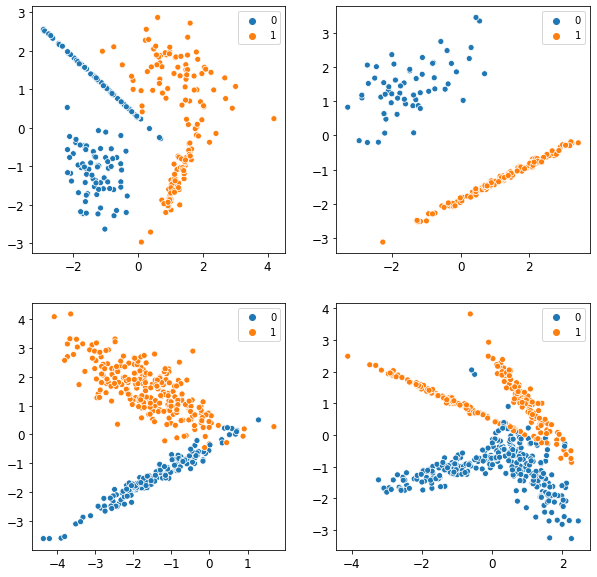

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification


X1, y1 = make_classification(n_samples=300, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=2, class_sep=1.25,
                          flip_y=0,weights=[0.5,0.5])

X1_plot = pd.DataFrame(X1)
y1_plot = pd.Series(y1)

X2,y2 = make_classification(n_samples=200, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=1.25,
                          flip_y=0,weights=[0.3,0.7])

X2_plot = pd.DataFrame(X2)
y2_plot = pd.Series(y2)

X3,y3 = make_classification(n_samples=400, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=1.5,
                          flip_y=0,weights=[0.4,0.6])

X3_plot = pd.DataFrame(X3)
y3_plot = pd.Series(y3)

X4,y4 = make_classification(n_samples=500, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=2, class_sep=1,
                          flip_y=0,weights=[0.6,0.4])

X4_plot = pd.DataFrame(X4)
y4_plot = pd.Series(y4)

f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
sns.scatterplot(X1_plot.values[:,0],X1_plot.values[:,1],hue=y1_plot,ax=ax1);
sns.scatterplot(X2_plot.values[:,0],X2_plot.values[:,1],hue=y2_plot,ax=ax2);
sns.scatterplot(X3_plot.values[:,0],X3_plot.values[:,1],hue=y3_plot,ax=ax3);
sns.scatterplot(X4_plot.values[:,0],X4_plot.values[:,1],hue=y4_plot,ax=ax4);

plt.show();

#3 - Função para plotagem do gradiente utilizando o SGD Classifier para três taxas de aprendizado

Argumentos: X, y, função de custo, número de iterações e taxas de aprendizado (três)

In [2]:
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

def line(x0, cf, interc):
        return (-(x0 * cf[0]) - interc[0]) / cf[1]

def plot_gradient_descent_clf(X, y, lf, n_iter, etas):
  colors = "bry"
  plt.figure(figsize=(10,3))
  plots = (131, 132, 133)
  m=0
  print("Função de Custo: ", lf)
  for k, p in zip(etas,plots):
    # cria um grid para plotar
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

    # Plota os dados de treino
    for i, color in zip((0,1), colors):
        idx = np.where(y == i)
        plt.subplot(p); plt.scatter(X[idx, 0], X[idx, 1])
    plt.subplot(p); plt.axis('tight')
    plt.subplot(p); plt.title(r"$\eta = {}$".format(k), fontsize=16)

    # Encontra os limites do gráfico
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    
    clf = SGDClassifier(loss = lf, eta0=k)

    for i in range(n_iter):
      clf.partial_fit(X, y, np.unique(y)) # Utiliza o partial_fit do SGD, que avança uma época por vez
      coef = clf.coef_[0]
      intercept = clf.intercept_
      if i==0:
        plt.subplot(p); plt.plot([xmin, xmax], [line(xmin, coef, intercept), line(xmax, coef, intercept)], "r--")
      else:
        plt.subplot(p); plt.plot([xmin, xmax], [line(xmin, coef, intercept), line(xmax, coef, intercept)], "b-")

    m=1
  plt.show()

Função de Custo:  hinge


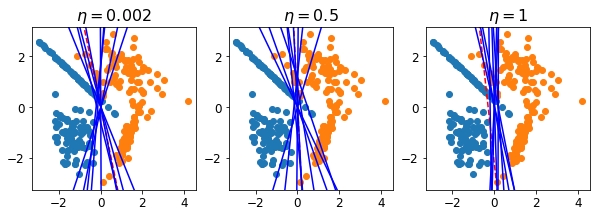

Função de Custo:  squared_loss


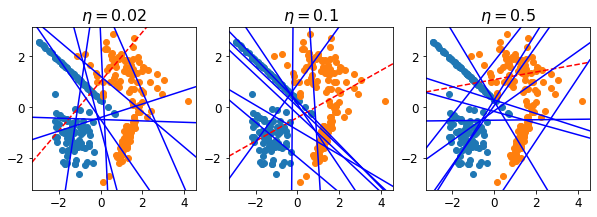

Função de Custo:  log


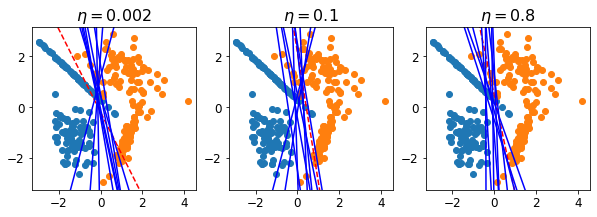

Função de Custo:  perceptron


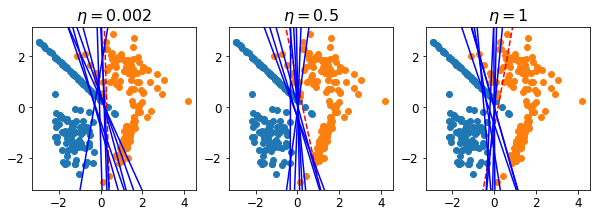

In [20]:
plot_gradient_descent_clf(X1, y1, 'hinge', 10, (0.002, 0.5, 1))
plot_gradient_descent_clf(X1, y1, 'squared_loss', 10, (0.02, 0.1, 0.5))
plot_gradient_descent_clf(X1, y1, 'log', 10, (0.002, 0.1, 0.8))
plot_gradient_descent_clf(X1, y1, 'perceptron', 10, (0.002, 0.5, 1))

Função de Custo:  hinge


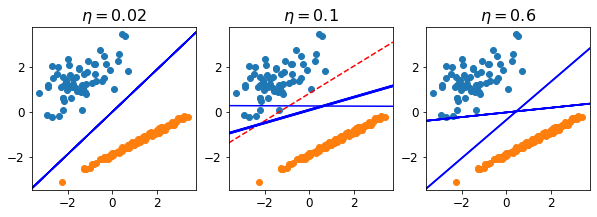

Função de Custo:  squared_loss


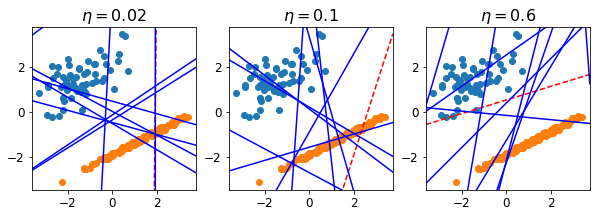

Função de Custo:  log


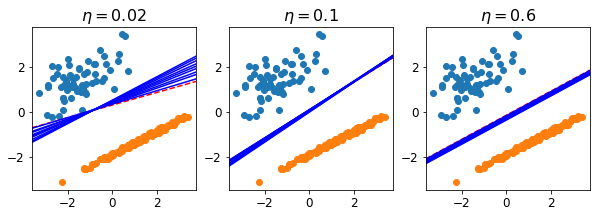

Função de Custo:  perceptron


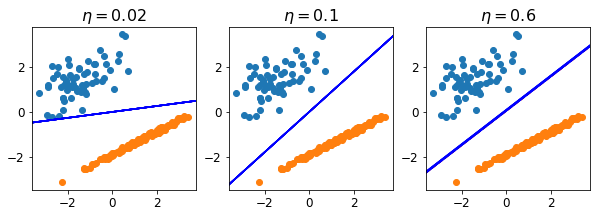

In [21]:
plot_gradient_descent_clf(X2, y2, 'hinge', 10, (0.02, 0.1, 0.6))
plot_gradient_descent_clf(X2, y2, 'squared_loss', 10, (0.02, 0.1, 0.6))
plot_gradient_descent_clf(X2, y2, 'log', 10, (0.02, 0.1, 0.6))
plot_gradient_descent_clf(X2, y2, 'perceptron', 10, (0.02, 0.1, 0.6))

Função de Custo:  hinge


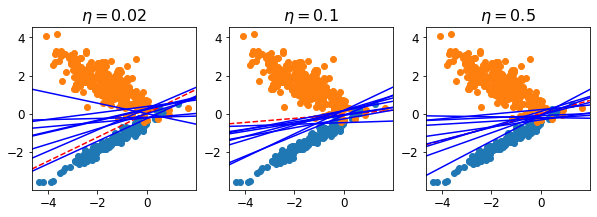

Função de Custo:  squared_loss


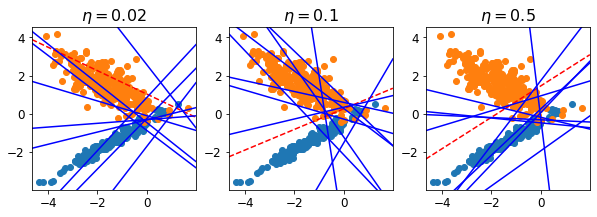

Função de Custo:  log


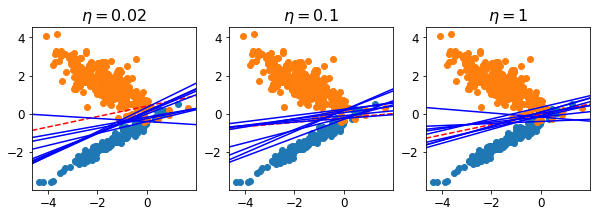

Função de Custo:  perceptron


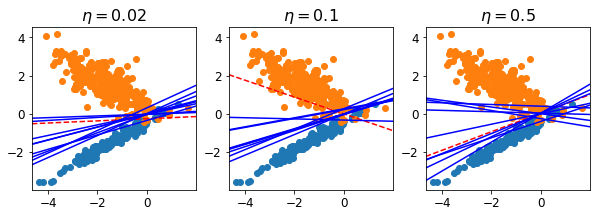

In [22]:
plot_gradient_descent_clf(X3, y3, 'hinge', 10, (0.02, 0.1, 0.5))
plot_gradient_descent_clf(X3, y3, 'squared_loss', 10, (0.02, 0.1, 0.5))
plot_gradient_descent_clf(X3, y3, 'log', 10, (0.02, 0.1, 1))
plot_gradient_descent_clf(X3, y3, 'perceptron', 10, (0.02, 0.1, 0.5))

Função de Custo:  hinge


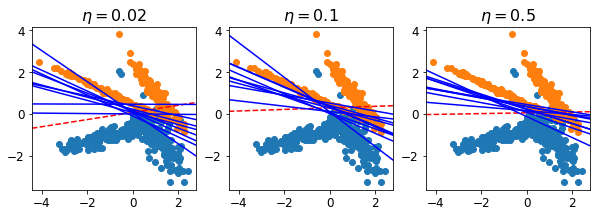

Função de Custo:  squared_loss


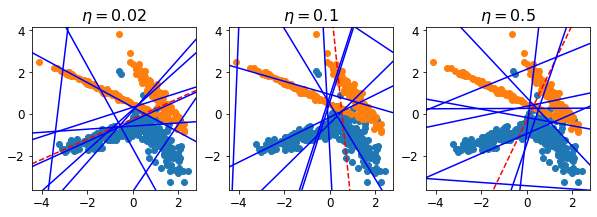

Função de Custo:  log


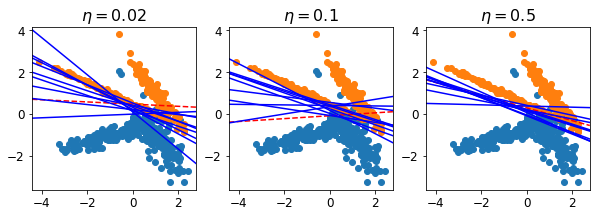

Função de Custo:  perceptron


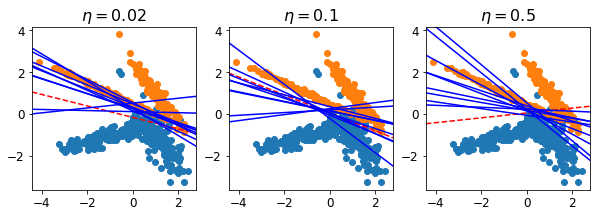

In [23]:
plot_gradient_descent_clf(X4, y4, 'hinge', 10, (0.02, 0.1, 0.5))
plot_gradient_descent_clf(X4, y4, 'squared_loss', 10, (0.02, 0.1, 0.5))
plot_gradient_descent_clf(X4, y4, 'log', 10, (0.02, 0.1, 0.5))
plot_gradient_descent_clf(X4, y4, 'perceptron', 10, (0.02, 0.1, 0.5))